# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.148739e+01     6.737122e+00
 * time: 0.003813028335571289
     1     2.955020e+01     4.619074e+00
 * time: 0.011913061141967773
     2     2.267819e+01     6.059368e+00
 * time: 0.031177043914794922
     3     1.529585e+01     1.924032e+00
 * time: 0.05435299873352051
     4     1.205781e+01     1.218591e+00
 * time: 0.07221508026123047
     5     1.175532e+01     1.734239e+00
 * time: 0.08750319480895996
     6     1.036459e+01     1.627685e+00
 * time: 0.10271716117858887
     7     9.736361e+00     1.575631e+00
 * time: 0.11903810501098633
     8     9.428238e+00     1.120445e+00
 * time: 0.13602614402770996
     9     9.187918e+00     9.343090e-01
 * time: 0.15181708335876465
    10     9.063246e+00     8.881804e-01
 * time: 0.16367816925048828
    11     8.989423e+00     8.686651e-01
 * time: 0.17574119567871094
    12     8.953029e+00     8.009608e-01
 * time: 0.18768310546875
    13     8.907669e+00     6.469808e-01
 * time:

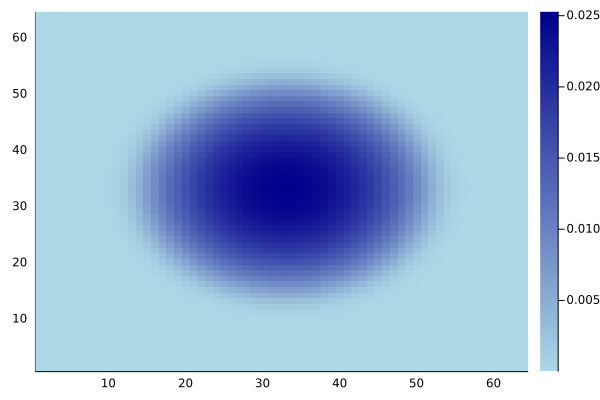

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)